## DATA AQuition

In [263]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings


plt.rcParams["figure.figsize"] = 15, 6

data = pd.read_csv("data/TLKM.JK (2).csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,4430.0,4460.0,4380.0,4410.0,3768.041016,66075600.0
1,2018-01-03,4380.0,4380.0,4200.0,4230.0,3614.243652,129205000.0
2,2018-01-04,4230.0,4250.0,4190.0,4220.0,3605.699219,77953300.0
3,2018-01-05,4220.0,4280.0,4200.0,4280.0,3656.965332,55863000.0
4,2018-01-08,4250.0,4290.0,4250.0,4260.0,3639.876709,42916700.0
...,...,...,...,...,...,...,...
1173,2022-09-12,4600.0,4600.0,4530.0,4540.0,4540.000000,74820600.0
1174,2022-09-13,4540.0,4560.0,4520.0,4520.0,4520.000000,91510200.0
1175,2022-09-14,4490.0,4530.0,4460.0,4480.0,4480.000000,97919200.0
1176,2022-09-15,4540.0,4600.0,4500.0,4500.0,4500.000000,125599900.0


## DATA EXPLORATION


In [264]:
data_type = type(data)
print(data_type)
data.isnull().sum()/len(data)

<class 'pandas.core.frame.DataFrame'>


Date         0.000000
Open         0.000849
High         0.000849
Low          0.000849
Close        0.000849
Adj Close    0.000849
Volume       0.000849
dtype: float64

In [265]:
data = data.drop(['Open','Low','Close','Adj Close','Volume'],axis='columns')
print(data.dtypes)
data

Date     object
High    float64
dtype: object


,Date,High
0,2018-01-02,4460.0
1,2018-01-03,4380.0
2,2018-01-04,4250.0
3,2018-01-05,4280.0
4,2018-01-08,4290.0
...,...,...
1173,2022-09-12,4600.0
1174,2022-09-13,4560.0
1175,2022-09-14,4530.0
1176,2022-09-15,4600.0


In [266]:
con = data['Date']
data["Date"]=pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
data.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14',
               '2022-09-15', '2022-09-16'],
              dtype='datetime64[ns]', name='Date', length=1178, freq=None)

In [267]:
data

,High
Date,
2018-01-02,4460.0
2018-01-03,4380.0
2018-01-04,4250.0
2018-01-05,4280.0
2018-01-08,4290.0
...,...
2022-09-12,4600.0
2022-09-13,4560.0
2022-09-14,4530.0


In [268]:
h_ts = data["High"]
h_ts.head(10)

Date
2018-01-02    4460.0
2018-01-03    4380.0
2018-01-04    4250.0
2018-01-05    4280.0
2018-01-08    4290.0
2018-01-09    4240.0
2018-01-10    4250.0
2018-01-11    4200.0
2018-01-12    4190.0
2018-01-15    4170.0
Name: High, dtype: float64

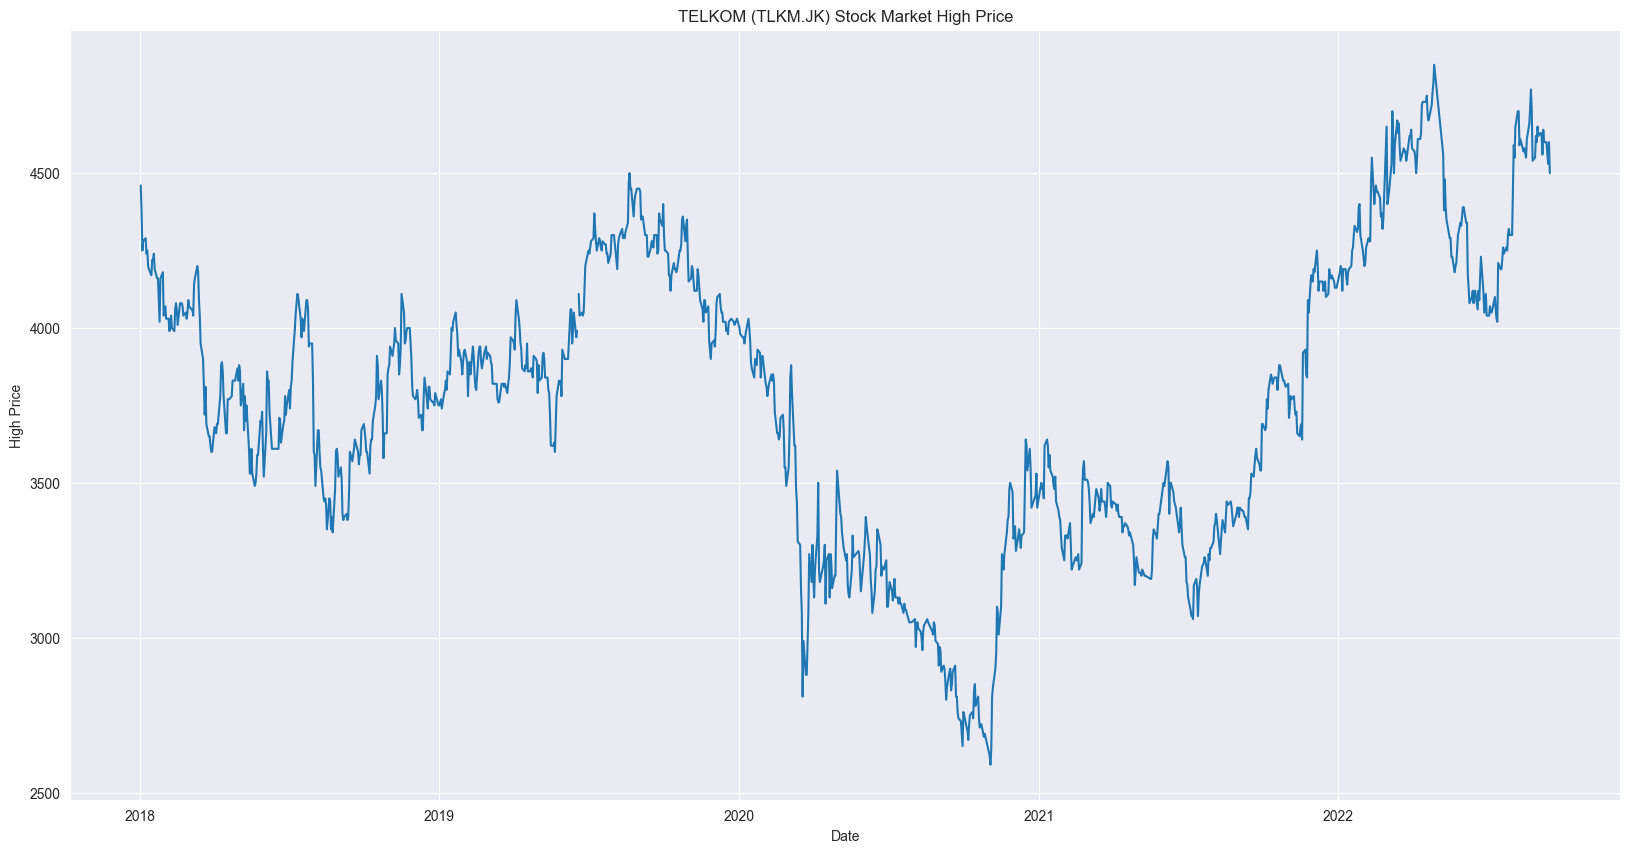

In [269]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.xlabel("Date")
plt.ylabel("High Price")
plt.title("TELKOM (TLKM.JK) Stock Market High Price")
plt.plot(data["High"])

## Uji Stasionaritas Data

In [270]:
def stationary_data_test(timeseries):
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    """print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)"""

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mea')
    std = plt.plot(rolstd, color='black', label = 'Rolling S')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

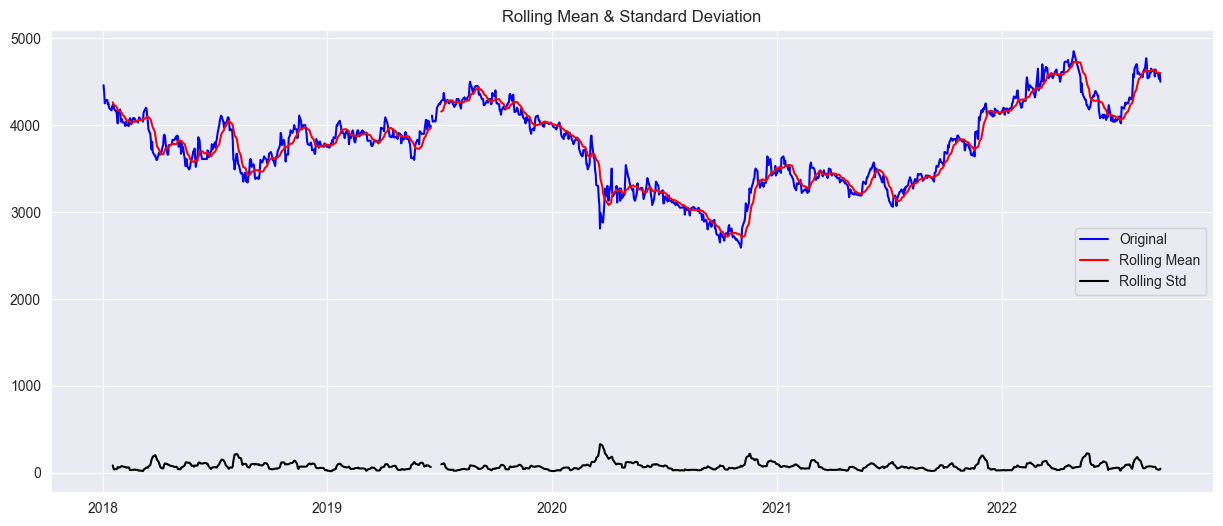

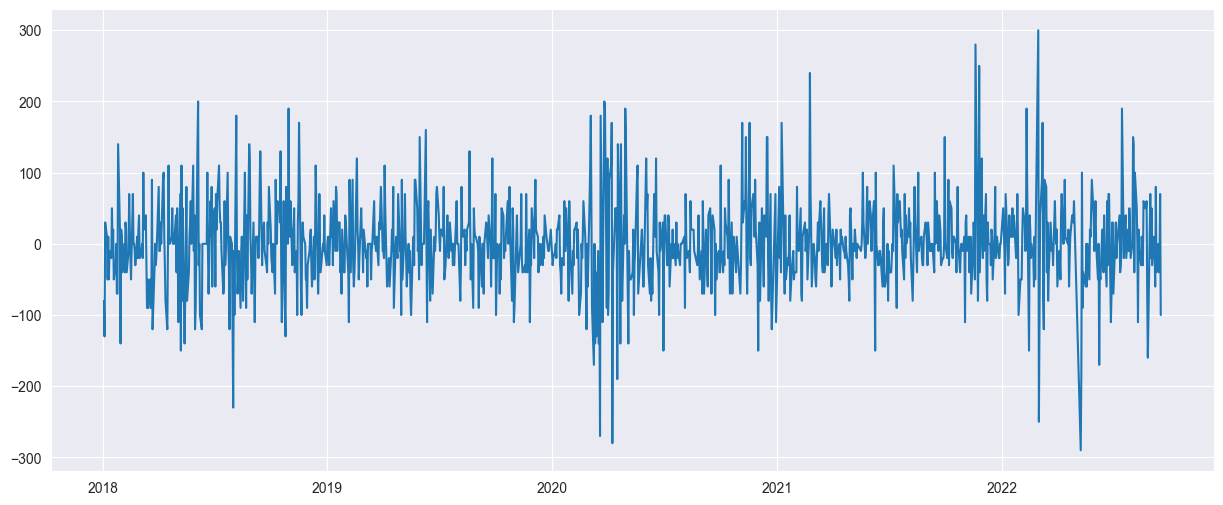

In [271]:
"""Uji Hipotesis
H0 = Data tidak stasioner
Ha = Data Stasioner
Tolak H0 apabila diperoleh p-value < alpha (0,05)"""

stationary_data_test(h_ts)
ts_diff_1 = h_ts - h_ts.shift()
ts_diff_1 = ts_diff_1.dropna()
plt.plot(ts_diff_1)


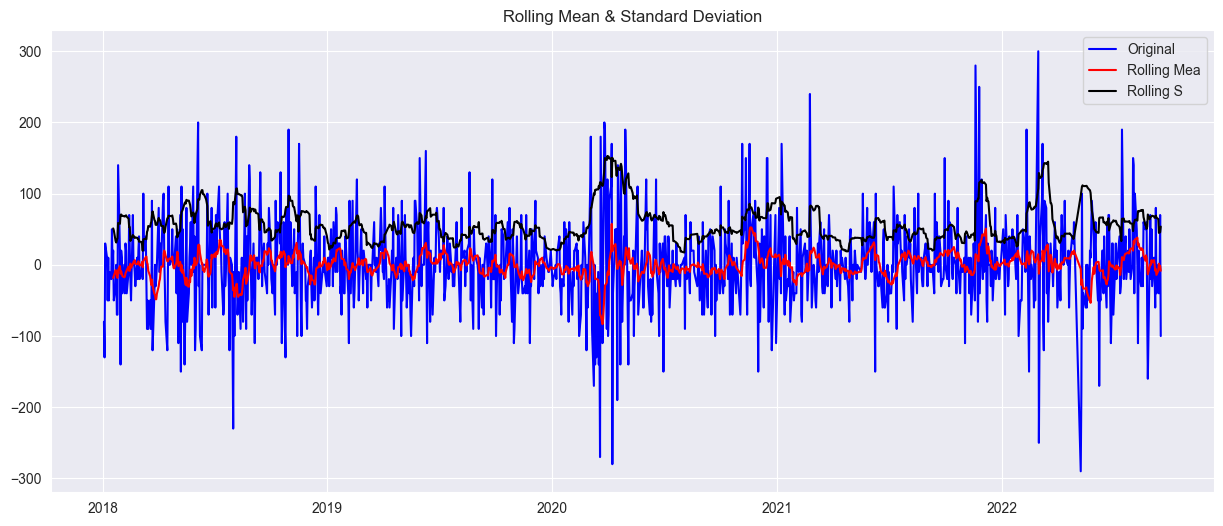

Results of Dickey-Fuller Test:
Test Statistic                  -26.866202
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1173.000000
Critical Value (1%)              -3.435937
Critical Value (5%)              -2.864007
Critical Value (10%)             -2.568084
dtype: float64


In [272]:
test_stationarity(ts_diff_1)

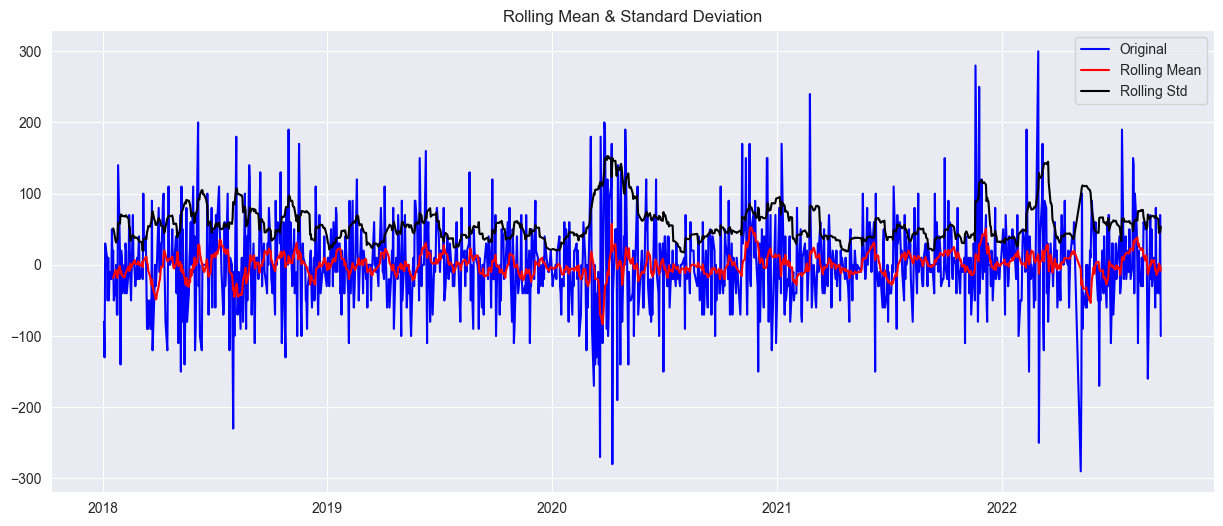

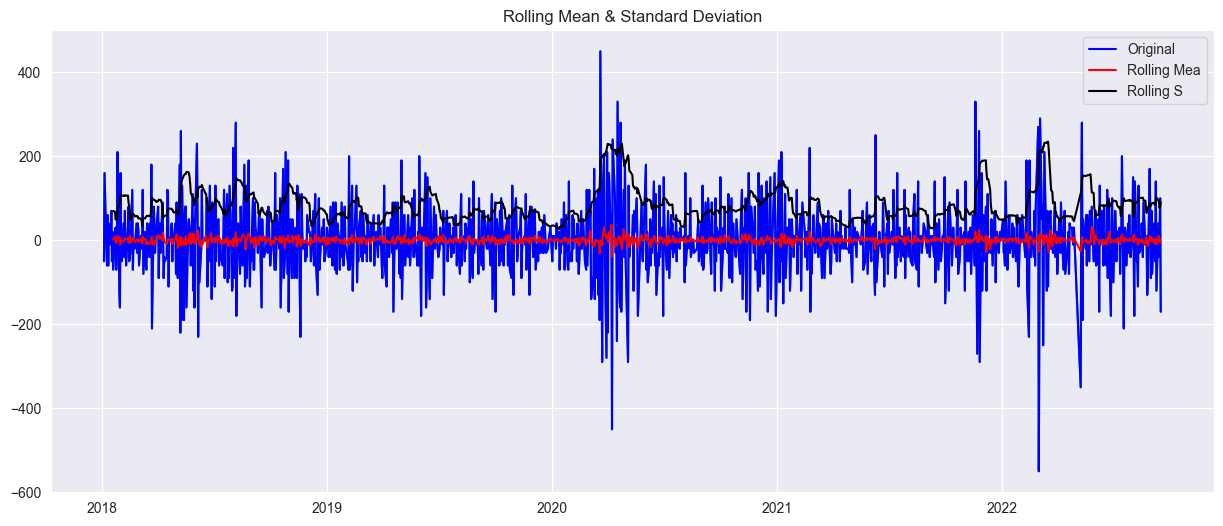

Results of Dickey-Fuller Test:
Test Statistic                -1.316531e+01
p-value                        1.282580e-24
#Lags Used                     2.200000e+01
Number of Observations Used    1.151000e+03
Critical Value (1%)           -3.436044e+00
Critical Value (5%)           -2.864054e+00
Critical Value (10%)          -2.568109e+00
dtype: float64


In [273]:
stationary_data_test(ts_diff_1)
ts_diff_2 = ts_diff_1 - ts_diff_1.shift()
ts_diff_2 = ts_diff_2.dropna()
plt.plot(ts_diff_2)
test_stationarity(ts_diff_2)

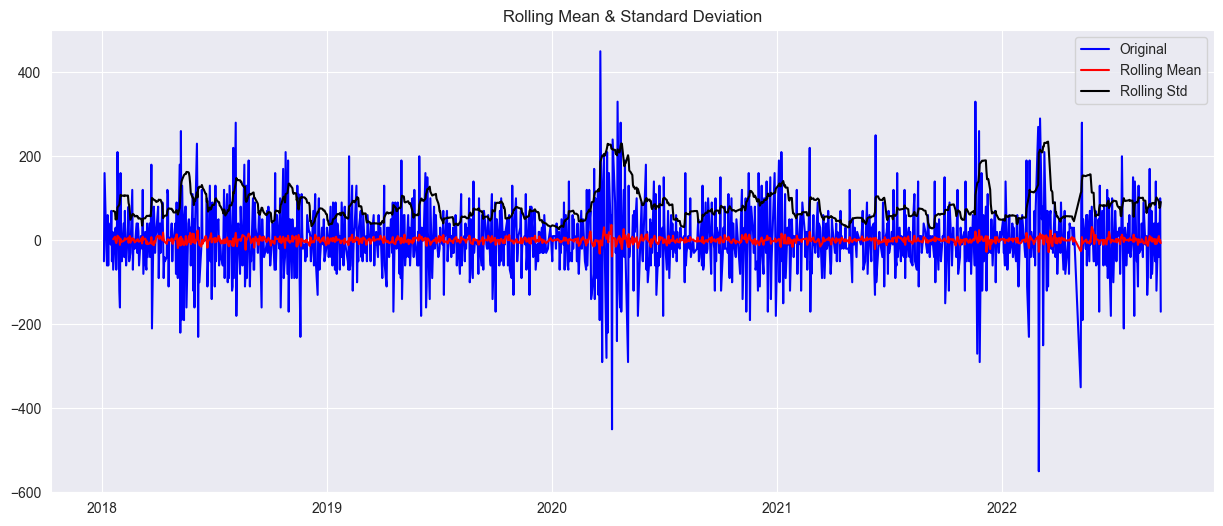

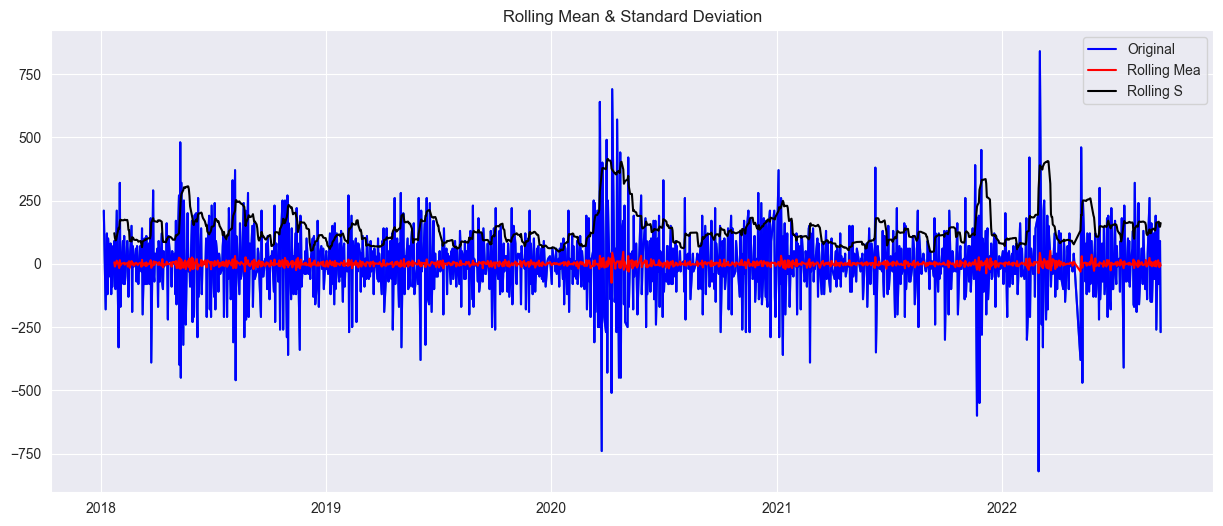

Results of Dickey-Fuller Test:
Test Statistic                -1.607168e+01
p-value                        5.498170e-29
#Lags Used                     2.300000e+01
Number of Observations Used    1.149000e+03
Critical Value (1%)           -3.436054e+00
Critical Value (5%)           -2.864059e+00
Critical Value (10%)          -2.568111e+00
dtype: float64


In [274]:
stationary_data_test(ts_diff_2)
ts_diff_3 = ts_diff_2 - ts_diff_2.shift()
ts_diff_3 = ts_diff_3.dropna()
plt.plot(ts_diff_3)
test_stationarity(ts_diff_3)

In [ ]:
result = seasonal_decompose(h_ts, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

Didapatkan data stationer setelah dilakukan proses differencing sebanyak 3x 

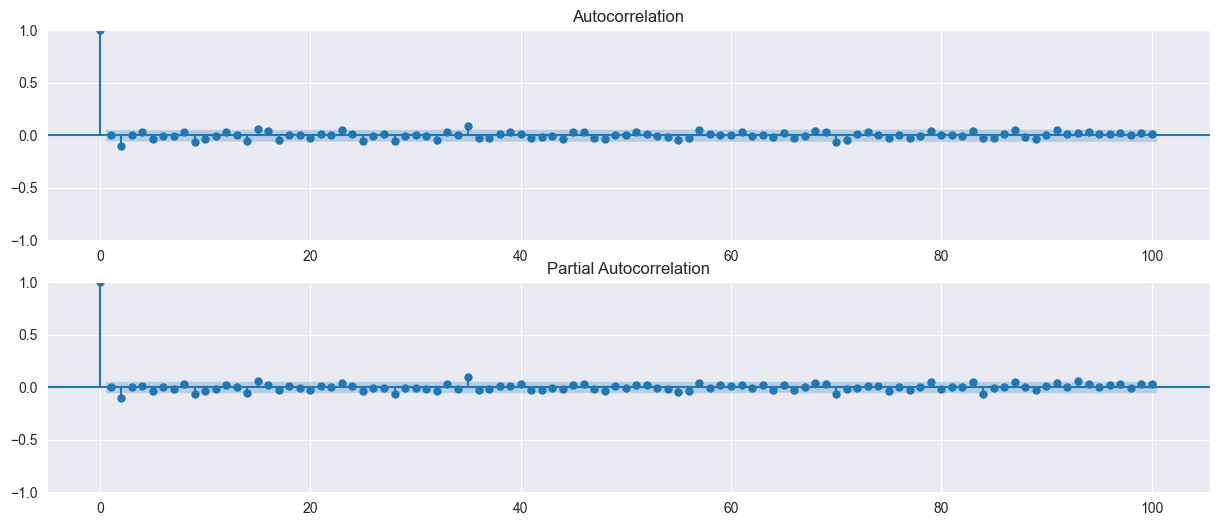

In [275]:
"""Plot_acf dan plot_pacf dibentuk untuk mengetahui orde dari AR dan MA"""

plt.figure()
plt.subplot(211)
plot_acf(ts_diff_1, ax=plt.gca(), lags=100)
plt.subplot(212)
plot_pacf(ts_diff_1, ax=plt.gca(), lags=100)
plt.show()

In [276]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.7)               #data trainingnya 70%
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [277]:
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(h_ts.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [278]:
model_ARIMA = ARIMA(h_ts, order=(0,0,0))
results_ARIMA = model_ARIMA.fit(disp=-1)
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues,copy=True)
plt.plot(ts_diff_1)             
plt.plot(predictions_ARIMA, color='red')  

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
